# COVID_Patient_Classifier_CV_UnderSampling

In [1]:
# Compare Algorithms
import pandas as pd
from matplotlib import pyplot
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from imblearn.ensemble import EasyEnsembleClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from imblearn.ensemble import BalancedRandomForestClassifier
from sklearn.svm import SVC
from collections import Counter
from sklearn.ensemble import GradientBoostingClassifier
import warnings
warnings.filterwarnings('ignore')
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [2]:
# load dataset,get a sample of 30,000 rows of data
file = '../clean_ml_data_0625.csv'
clean_df = pd.read_csv(file)
clean_df = clean_df.sample(30000)
clean_df.head()

,gender,pneumonia,pregnant,diabetes,copd,asthma,immunosup,hypertension,cardiovascular,obesity,renal_chronic,tobacco,closed_contact,another_complication,death,intubation,ICU,new_age
1063490,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,2
419266,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,4
420923,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,4
756129,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4
6069,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,3


In [3]:
# get the target column ['death'] and rest of the features, excluing death, ICU and Intubation
y= clean_df['death']
X = clean_df.drop(columns = ['ICU','intubation','death'])

In [4]:
# Check the X columns
X.columns

Index(['gender', 'pneumonia', 'pregnant', 'diabetes', 'copd', 'asthma',
       'immunosup', 'hypertension', 'cardiovascular', 'obesity',
       'renal_chronic', 'tobacco', 'closed_contact', 'another_complication',
       'new_age'],
      dtype='object')

In [5]:
# Split the training and test dataset to fit the model
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state =42, stratify=y)

In [6]:
from sklearn.preprocessing import StandardScaler
# Creating StandardScaler instance
scaler = StandardScaler()
# Fitting standard scaler
X_scaler = scaler.fit(X_train)

# Scaling data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [7]:
# # Resample the training data with SMOTE
# from imblearn.over_sampling import SMOTE
# X_resampled_s, y_resampled_s = SMOTE(random_state=1,
# sampling_strategy='auto').fit_resample(X_train_scaled,y_train)
# # Counter(y_resampled_s)

In [7]:
# # Resample the training data with UnderSampling
from imblearn.under_sampling import RandomUnderSampler
ros = RandomUnderSampler(random_state=1)
X_resampled_s, y_resampled_s = ros.fit_resample(X_train_scaled, y_train)
Counter(y_resampled_s)

Counter({0: 2243, 1: 2243})

In [8]:
# # Use SMOTEENN resampling method
# from imblearn.combine import SMOTEENN 
# smote_enn = SMOTEENN(random_state=0)
# X_resampled_s, y_resampled_s = smote_enn.fit_resample(X_train_scaled,y_train)
# Counter(y_resampled_s)

In [8]:
# prepare classifier models
models = []
models.append(('LR', LogisticRegression(max_iter=1000,solver='lbfgs', random_state=1)))
models.append(('SVM', SVC(kernel='linear')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('GBC', GradientBoostingClassifier(n_estimators=20,learning_rate=1,max_features=None,max_depth=3,random_state=0)))
models.append(('NB', GaussianNB()))
models.append(('RF2', RandomForestClassifier(max_depth=2, random_state=0)))
models.append(('RF4', RandomForestClassifier(max_depth=4, random_state=0)))
models.append(('RF6', RandomForestClassifier(max_depth=6, random_state=0)))

In [9]:
# evaluate each model in turn
results = []
names = []
scoring = 'recall'

for name, model in models:
    kfold = KFold(n_splits=10)
    cv_results = cross_val_score(model, X_resampled_s, y_resampled_s, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.512543 (0.421865)
SVM: 0.497596 (0.411004)
LDA: 0.495364 (0.409242)
KNN: 0.253684 (0.253776)
CART: 0.512768 (0.421913)
GBC: 0.530616 (0.435251)
NB: 0.478623 (0.397160)
RF2: 0.507634 (0.418084)
RF4: 0.517005 (0.424993)
RF6: 0.532398 (0.436558)


In [10]:
# prepare classifier models
models1 = []
models1.append(('EEC', EasyEnsembleClassifier(random_state=1,n_estimators = 100)))
models1.append(('brfc', BalancedRandomForestClassifier(n_estimators=100, random_state=42)))

In [11]:
# evaluate each model in turn
for name, model in models1:
    kfold = KFold(n_splits=10)
    cv_results = cross_val_score(model, X_train_scaled, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

EEC: 0.842311 (0.027634)
brfc: 0.887382 (0.018200)


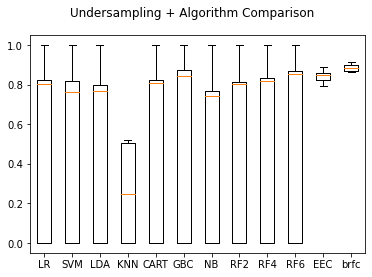

In [13]:
# boxplot algorithm comparison
fig = pyplot.figure()
fig.suptitle('Undersampling + Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()